### **Introduction**
#### This notebook explores electric vehicles dateset to analyze and answer following questions:
1. "What is the distribution of electric vehicle types?"
2. "Which states have the highest number of electric vehicles?"
3. "Which car make has the highest average MSRP, Electric Range?"
4. "Which model year has the highest number of electric vehicles?"
5. "Which city has the most expensive vehicles on average?"
6. "What is the correlation between electric range and MSRP?"
7. "What is the average electric range for Makes with a MSRP higher than $30,000?"

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

electric_vehicle = pd.read_csv("Data Source/Electric_Vehicle_Population_Data.csv")
electric_vehicle.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP8D,King,Shoreline,WA,98177.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
1,5YJSA1E45K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,WVGUNPE28M,Kitsap,Olalla,WA,98359.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP6H,Thurston,Olympia,WA,98501.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
4,1FADP5CU9G,Thurston,Olympia,WA,98506.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10


In [220]:
electric_vehicle.columns.to_list()

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal Code',
 'Model Year',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

In [221]:
electric_vehicle.drop(columns = [
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Legislative District',
    '2020 Census Tract','Electric Utility',
    'DOL Vehicle ID'], inplace=True)
electric_vehicle.rename(columns={
    'Postal Code':'postal_code',
    'Model Year':'model_year',
    'Electric Vehicle Type':'electric_vehicle_type',
    'Electric Range':'electric_range',
    'Base MSRP':'base_MSRP',
    'Vehicle Location':'vehicle_location'
    },inplace=True)
electric_vehicle.columns = electric_vehicle.columns.str.lower()

In [222]:
electric_vehicle.isnull().any()

vin (1-10)               False
county                    True
city                      True
state                    False
postal_code               True
model_year               False
make                     False
model                    False
electric_vehicle_type    False
electric_range            True
base_msrp                 True
vehicle_location          True
dtype: bool

In [223]:
electric_vehicle.dropna(inplace=True)
electric_vehicle.isnull().sum()

vin (1-10)               0
county                   0
city                     0
state                    0
postal_code              0
model_year               0
make                     0
model                    0
electric_vehicle_type    0
electric_range           0
base_msrp                0
vehicle_location         0
dtype: int64

In [224]:
electric_vehicle = electric_vehicle.loc[(electric_vehicle['electric_range'] != 0) & (electric_vehicle['base_msrp'] !=0)]

#### What is the distribution of electric vehicle types?

Text(0.5, 1.0, 'Electric Vehicle Type')

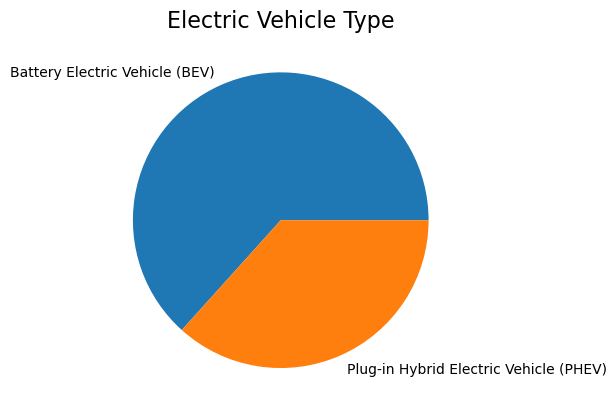

In [225]:
ev_type_distribution = electric_vehicle['electric_vehicle_type'].value_counts().reset_index()
ev_type_distribution.columns = ['electric_vehicle_type', 'count']
plt.pie(ev_type_distribution['count'],labels=ev_type_distribution['electric_vehicle_type'])
plt.title('Electric Vehicle Type',fontsize = 16)

#### Which states have the highest number of electric vehicles?

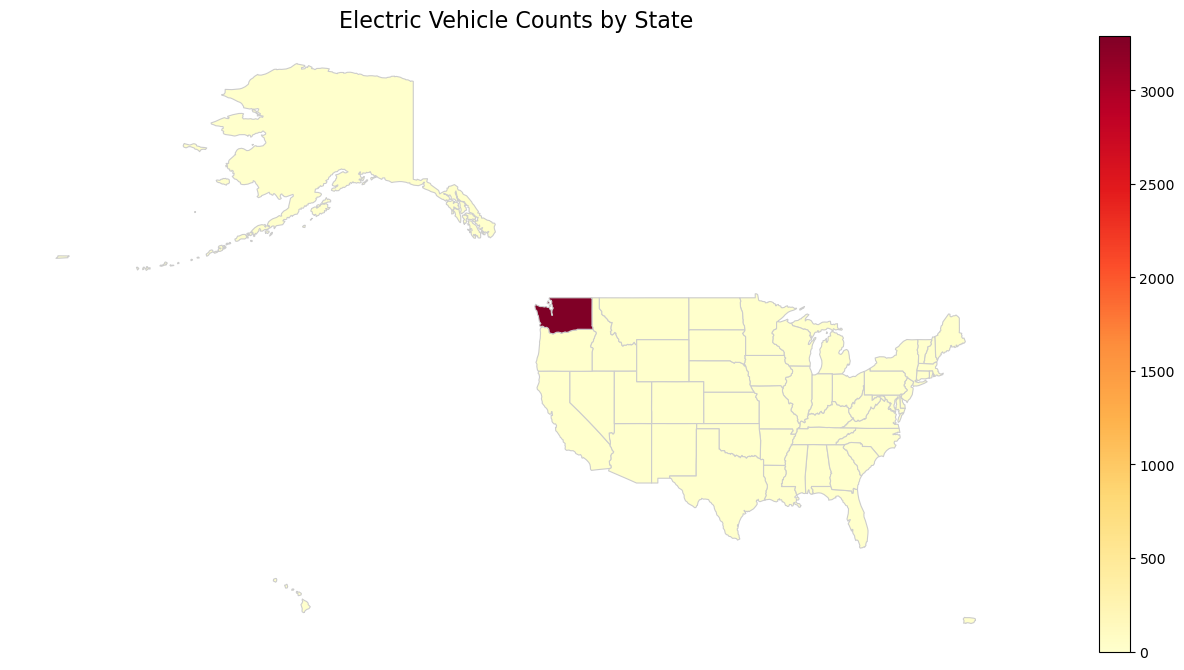

In [261]:
import geopandas as gpd
from us import states

state_counts = electric_vehicle['state'].value_counts().reset_index()
state_counts.columns = ['state','count']
state_counts['state_full'] = state_counts['state'].apply(lambda x: states.lookup(x).name if states.lookup(x) else None)

us_states = gpd.read_file(r'Data Source\us-states.geojson') 
us_states = us_states.merge(state_counts, how='left', left_on='name', right_on='state_full') 
us_states['count'].fillna(0,inplace = True)


fig, ax = plt.subplots(1, 1, figsize=(20, 8))
us_states.plot(column='count', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
plt.title('Electric Vehicle Counts by State', fontsize=16)
plt.axis('off')
plt.show()

#### Which car make has the highest average MSRP, Electric Range?

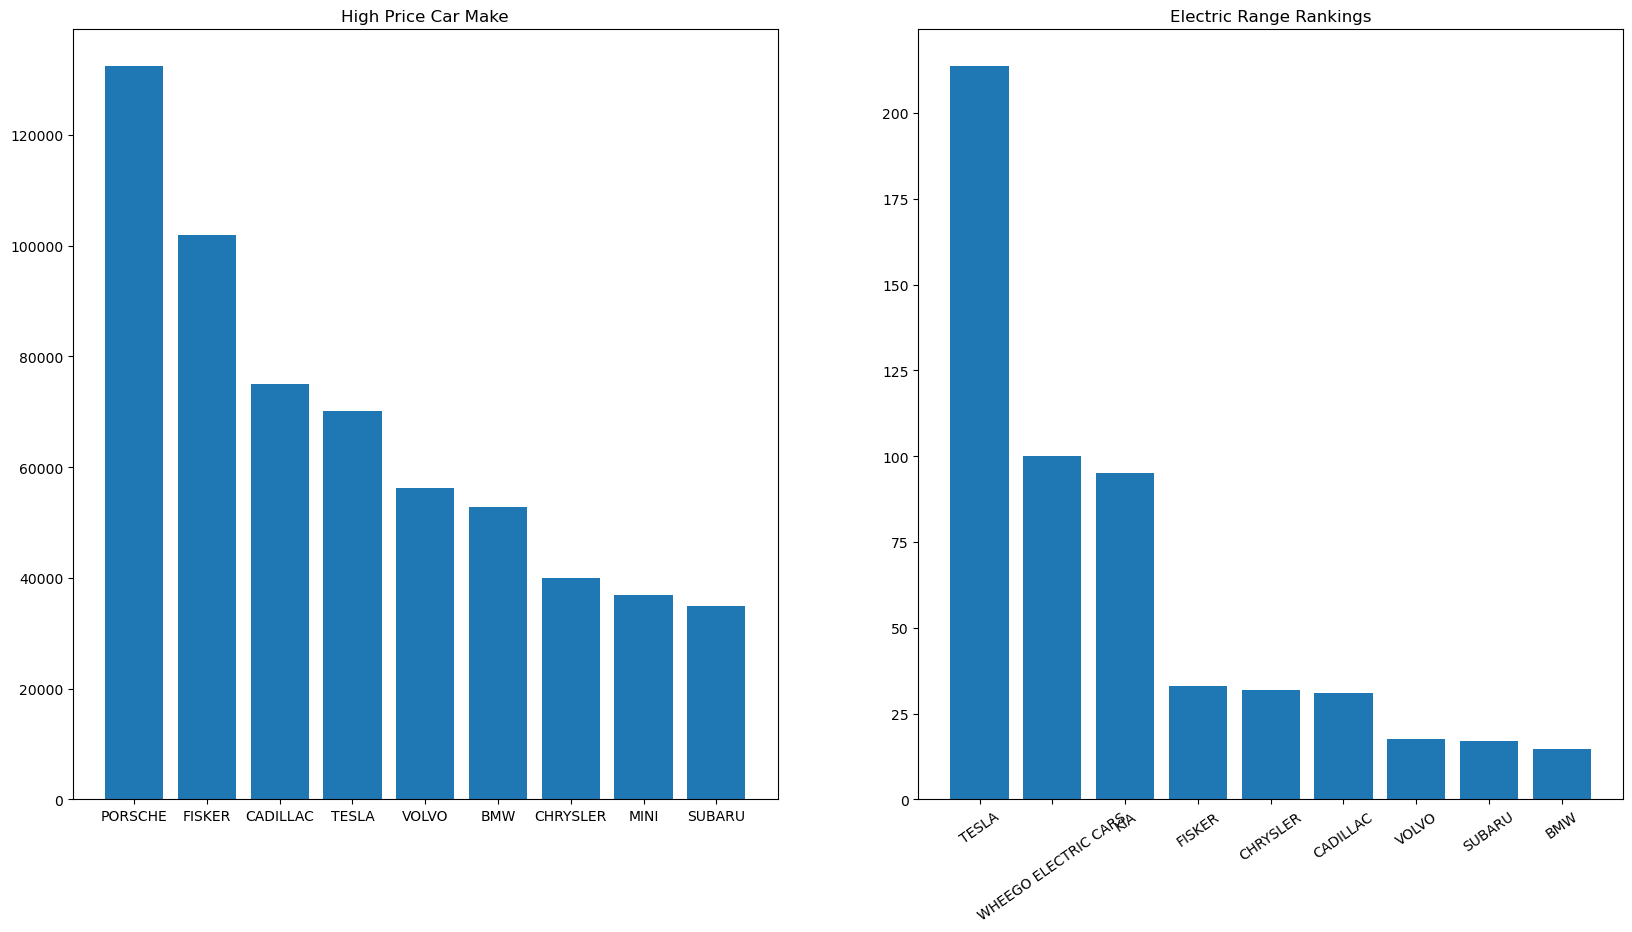

In [227]:

high_end_car_make = electric_vehicle.groupby('make', dropna=True).agg({'base_msrp':'mean'}).reset_index('make').sort_values(by='base_msrp', ascending=False)[:9]
electric_range_car_make = electric_vehicle.groupby('make', dropna=True).agg({'electric_range':'mean'}).reset_index('make').sort_values(by='electric_range', ascending=False)[:9]

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].bar(x='make',height = 'base_msrp', data = high_end_car_make)
ax[0].set_title('High Price Car Make')
ax[1].bar(x='make',height = 'electric_range',data = electric_range_car_make)
ax[1].set_title('Electric Range Rankings')
ax[1].tick_params(axis='x', rotation=35)




#### Which model year has the highest number of electric vehicles?

Text(0.5, 0, 'Year')

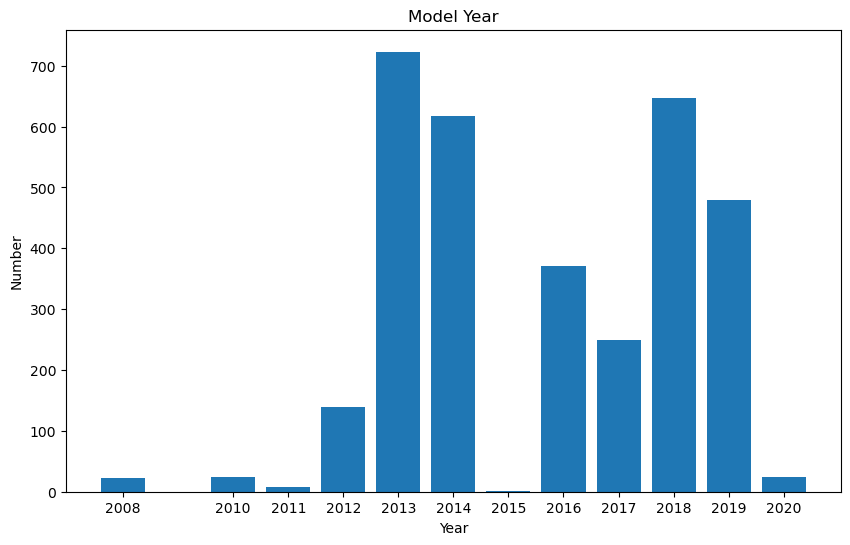

In [206]:
model_year_ct = electric_vehicle['model_year'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(x=model_year_ct.index,data=model_year_ct, height=model_year_ct.values)
plt.xticks(model_year_ct.index,labels=model_year_ct.index)
plt.title('Model Year')
plt.ylabel('Number')
plt.xlabel('Year')

#### Which city has the most expensive vehicles on average?

Text(0.5, 0, 'Price')

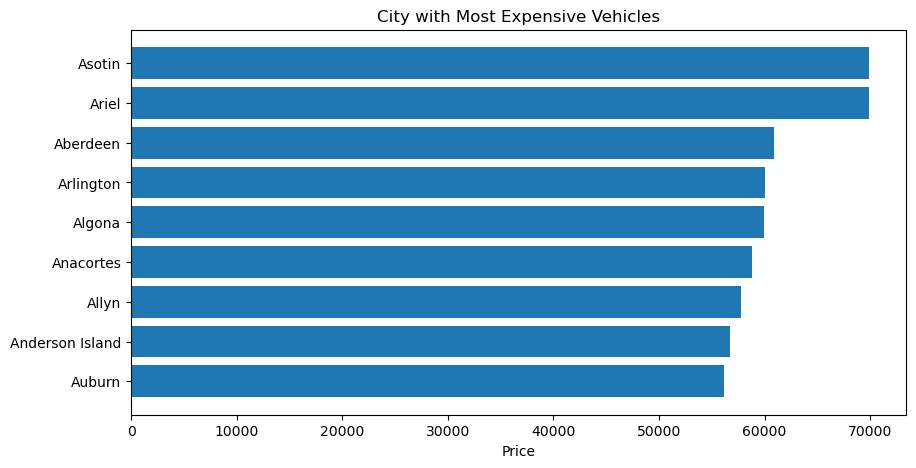

In [ ]:
avg_msrp_by_city = electric_vehicle.groupby('city')['base_msrp'].mean().reset_index()[:9].sort_values(by='base_msrp')

plt.figure(figsize=(10,5))
plt.barh(data=avg_msrp_by_city,y = 'city',width='base_msrp')
plt.title('City with Most Expensive Vehicles')
plt.xlabel('Price')


#### What is the correlation between electric range and MSRP?

Text(0.5, 1.0, 'Electric Range vs Base MSRP')

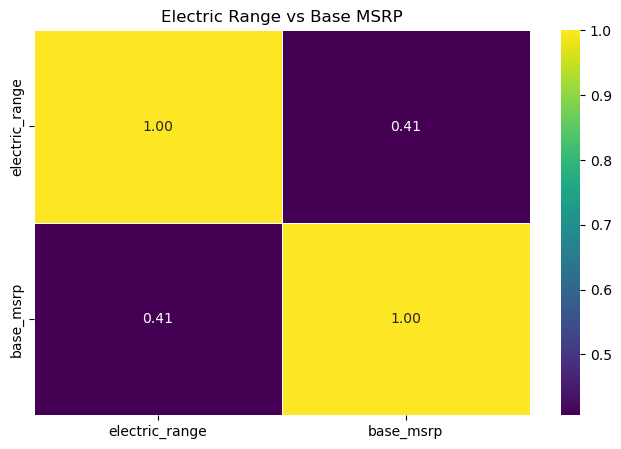

In [246]:
import seaborn as sns

correlation = electric_vehicle[['electric_range', 'base_msrp']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Electric Range vs Base MSRP')



#### What is the average electric range for Makes with a MSRP higher than $30,000?

Text(0, 0.5, 'Electric Range (miles)')

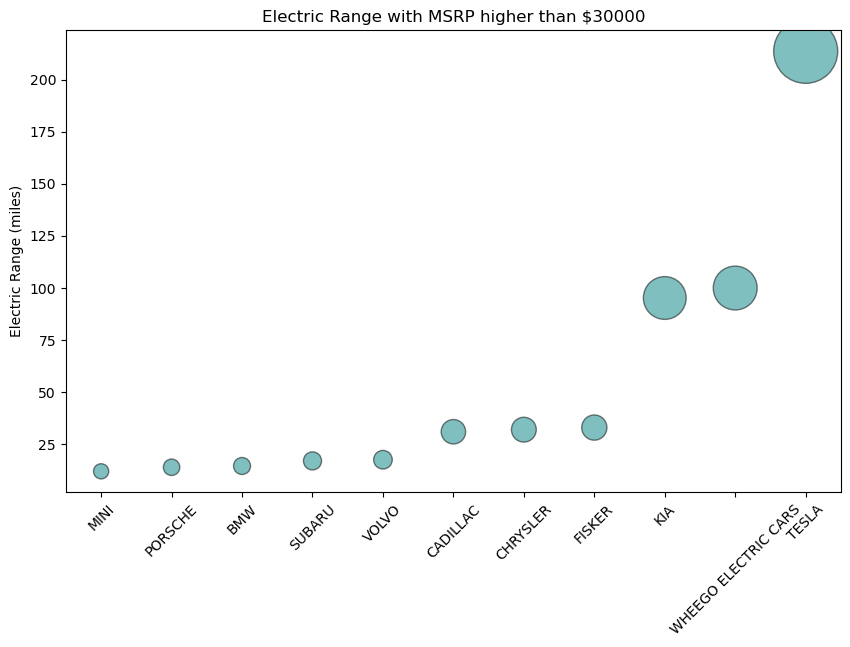

In [256]:
high_msrp_vehicles = electric_vehicle[electric_vehicle['base_msrp'] > 30000]
high_msrp_vehicles_electric_range = high_msrp_vehicles.groupby('make')['electric_range'].mean().reset_index().sort_values(by='electric_range')
bubble_size = [120, 140, 150, 170, 180, 310, 320, 330, 950, 1000, 2130]

plt.figure(figsize=(10, 6))
plt.scatter('make','electric_range', data = high_msrp_vehicles_electric_range,s=bubble_size, alpha=0.5, c='teal', edgecolors='k')
plt.title('Electric Range with MSRP higher than $30000')
plt.xticks(rotation = 45)
plt.ylabel('Electric Range (miles)')
